# Descriptive Statistics

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm, binom, poisson, zscore
import scipy.special
import numpy as np
import janitor
import matplotlib.pyplot as plt
import string

In [2]:
pd.set_option("display.max_columns", 100)

## Infectious Disease

In [3]:
df = pd.read_csv('data/HOSPITAL.DAT.txt').clean_names()

In [4]:
df.head()

,id,dur_stay,age,sex,temp,wbc,antibio,bact_cul,service
0,1,5,30,2,99.0,8,2,2,1
1,2,10,73,2,98.0,5,2,1,1
2,3,6,40,2,99.0,12,2,2,2
3,4,11,47,2,98.2,4,2,2,2
4,5,5,25,2,98.5,11,2,2,2


#### 2.1 

In [5]:
df.dur_stay.mean()

8.6

In [6]:
df.dur_stay.median()

8.0

#### 2.2

In [7]:
df.dur_stay.std()

5.715476066494082

In [8]:
(df.dur_stay.min(), df.dur_stay.max())

(3, 30)

#### 2.3

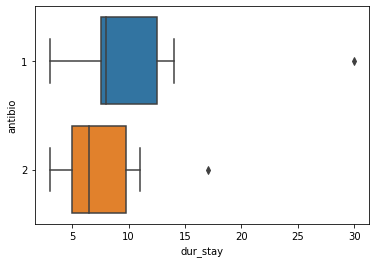

In [9]:
sns.boxplot(data=df, x='dur_stay', y='antibio', orient='h');

#### 2.4

Median will be also multiplied

In [10]:
(df.dur_stay*2).median(), df.dur_stay.median()*2

(16.0, 16.0)

#### 2.5

Mode will be also multiplied

In [11]:
(df.dur_stay*2).min(), (df.dur_stay*2).max()

(6, 60)

#### 2.6

Geometrical mean will be also multiplied

In [12]:
scipy.stats.gmean(df.dur_stay*2), scipy.stats.gmean(df.dur_stay)*2

(14.6064776206551, 14.60647762065509)

#### 2.7

Rande will be also multiplied

In [13]:
((df.dur_stay*2).min(), (df.dur_stay*2).max()), ((df.dur_stay).min()*2, (df.dur_stay).max()*2)

((6, 60), (6, 60))

## Health promotion

In [14]:
scipy.stats.gmean(df.dur_stay*2), scipy.stats.gmean(df.dur_stay)*2

(14.6064776206551, 14.60647762065509)

In [15]:
df = pd.DataFrame([12.8, 12.2, 12.25, 12.18, 11.53, 12.47, 12.30, 12.08, 11.72, 11.57, 11.73, 12.67, 11.92, 11.67, 11.80, 12.33, 12.55, 11.83], index=range(1,19), columns=['time'])
df.head()

,time
1,12.80
2,12.20
3,12.25
4,12.18
5,11.53


#### 2.8 

In [16]:
df.time.mean()

12.088888888888892

#### 2.9

In [17]:
df.time.std()

0.38741813387800583

#### 12.10

In [18]:
df['time_100'] = (df.time*100).astype(int)
df.sample(5)

,time,time_100
13,11.92,1192
11,11.73,1173
9,11.72,1172
1,12.80,1280
12,12.67,1267


In [19]:
df.time_100.mean()

1208.888888888889

In [20]:
df.time_100.std()

38.74181338780057

#### 2.12

<AxesSubplot:xlabel='time'>

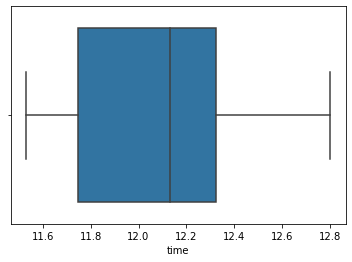

In [21]:
sns.boxplot(data=df, x='time')

In [22]:
iqr = scipy.stats.iqr(df.time)
upper_limit = np.percentile(df.time, 75) + 1.5*iqr

In [23]:
12.97 > upper_limit

False

## Cardiovascular Disease

In [24]:
df = pd.read_excel('data/Cholesterol.xlsx').set_index('Subject')
df.Difference = df.Before - df.After

In [25]:
df.sample(5)

,Before,After,Difference
Subject,,,
2,145,155,-10
5,244,208,36
15,151,149,2
18,222,187,35
10,224,208,16


#### 2.13

In [26]:
df.Difference.mean()

19.541666666666668

#### 2.14

In [27]:
df.Difference.mean()

19.541666666666668

In [28]:
df.Difference.std()

16.805742203618763

#### 2.16

In [29]:
df.Difference.median()

19.0

#### 2.17

<AxesSubplot:xlabel='Difference'>

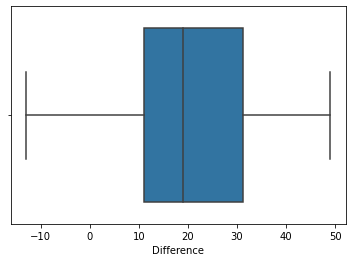

In [30]:
sns.boxplot(data=df, x='Difference')

#### 2.18

In [31]:
df['base_level'] = (df.Before < df.Before.median()).map({True: 'low', False: 'high'})

<AxesSubplot:xlabel='base_level', ylabel='Difference'>

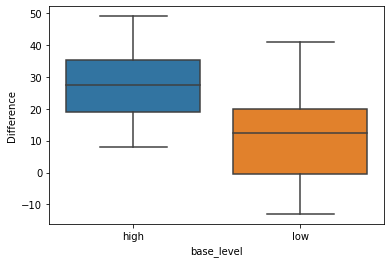

In [32]:
sns.boxplot(data=df, x='base_level', y='Difference')

## Hypertension

In [33]:
df = pd.read_excel('data/hypertension.xlsx').set_index('Participant')
df.sample(5)

,Recumbent systolic,Recumbent diastolic,Standing systolic,Standing diastolic
Participant,,,,
P. F. W.,106,62,94,56
E. H. B.,108,60,96,56
T. H. S.,102,68,96,64
R. H. P.,110,78,100,64
R. E. S.,116,76,88,60


C:\Users\sendi\miniconda3\envs\bayes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Standing systolic', ylabel='Standing diastolic'>

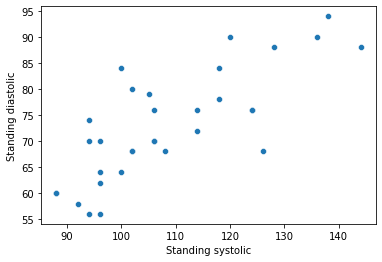

In [34]:
sns.scatterplot(df['Standing systolic'], df['Standing diastolic'])

#### 2.19

In [35]:
df['Systolic diff'] = df['Recumbent systolic'] - df['Standing systolic']
df['Diastolic diff'] = df['Recumbent diastolic'] - df['Standing diastolic']

In [36]:
df['Systolic diff'].mean(), df['Systolic diff'].median()

(8.8125, 8.0)

In [37]:
df['Diastolic diff'].mean(), df['Diastolic diff'].median()

(0.9375, 1.0)

#### 2.20

<AxesSubplot:ylabel='Diastolic diff'>

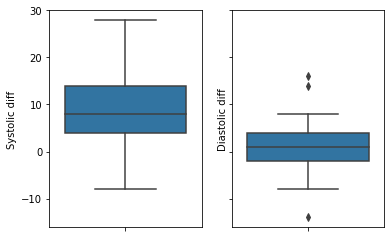

In [38]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(data=df, y='Systolic diff', ax=ax1)
sns.boxplot(data=df, y='Diastolic diff', ax=ax2)

#### 2.22

In [39]:
df['Systolic diff'].quantile([0.1, 0.9])

0.1     0.2
0.9    15.8
Name: Systolic diff, dtype: float64

## Pulmonary Disease

In [40]:
df = pd.read_csv('data/FEV.DAT.txt').clean_names().set_index('id')
df.sample(5)

,age,fev,hgt,sex,smoke
id,,,,,
71201,10,3.090,65.0,1,0
38001,11,2.827,62.5,0,0
5101,10,3.111,66.0,1,0
14501,8,1.940,59.0,1,0
74901,11,3.280,66.0,1,0


#### 2.23

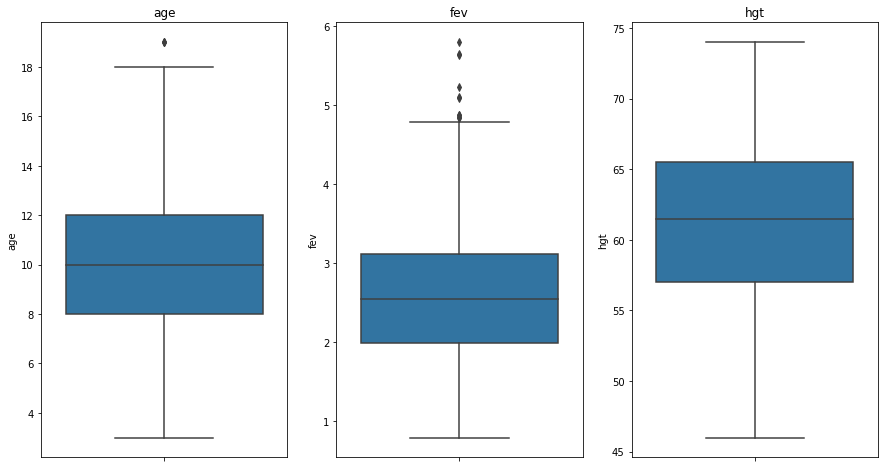

In [41]:
cols = df.columns[:3]
f, axes = plt.subplots(1, len(cols), figsize=(15, 8))
for ax, col in zip(axes, cols):
    sns.boxplot(data=df, y=col, ax=ax).set_title(col)

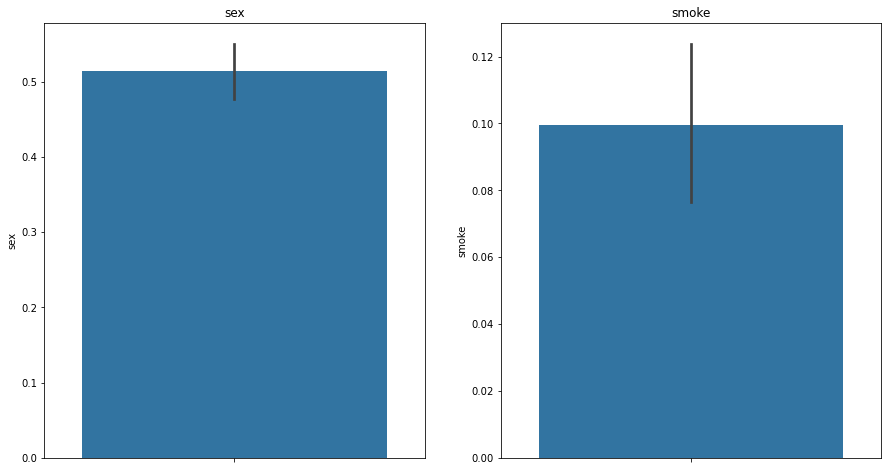

In [42]:
cols = df.columns[3:]
f, axes = plt.subplots(1, len(cols), figsize=(15, 8))
for ax, col in zip(axes, cols):
    sns.barplot(data=df, y=col, ax=ax).set_title(col)

#### 2.24

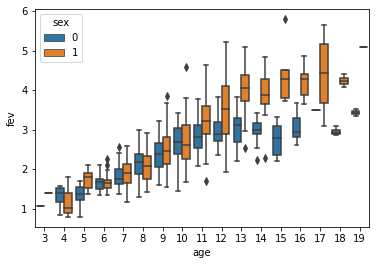

In [43]:
sns.boxplot(data=df, y='fev', x='age', hue='sex');

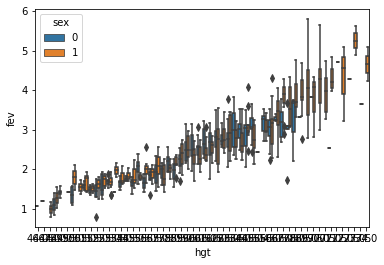

In [44]:
sns.boxplot(data=df, y='fev', x='hgt', hue='sex');

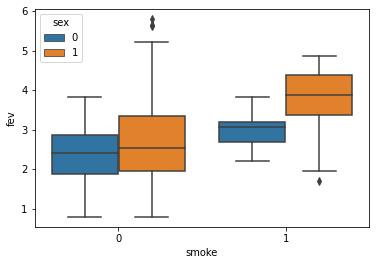

In [45]:
sns.boxplot(data=df, y='fev', x='smoke', hue='sex');

#### 2.25

In [46]:
df['age_ctg'] = pd.cut(df.age, [2, 4, 9, 14, 19])

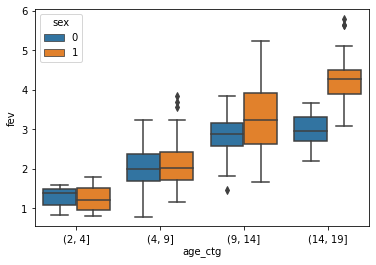

In [47]:
sns.boxplot(data=df, y='fev', x='age_ctg', hue='sex');

In [48]:
df.groupby(['age_ctg', 'sex']).fev.mean().unstack()

sex,0,1
age_ctg,,
"(2, 4]",1.280857,1.248250
"(4, 9]",2.028878,2.092733
"(9, 14]",2.872844,3.286729
"(14, 19]",2.961864,4.319852


## Nutrition

In [49]:
df = pd.read_csv('data/VALID.DAT.txt').clean_names().set_index('id')
df.sample(5)

,sfat_dr,sfat_ffq,tfat_dr,tfat_ffq,alco_dr,alco_ffq,cal_dr,cal_ffq
id,,,,,,,,
107744,21.35,30.4,55.18,71.0,7.18,12.84,1253,1259.8
135324,20.39,16.9,62.54,48.0,3.77,1.06,1634,1140.4
134021,19.03,11.2,47.56,29.0,0.90,0.00,1321,1254.6
132327,22.61,13.8,65.19,34.6,2.69,0.76,1769,1539.8
110406,20.71,27.7,49.77,70.1,8.09,10.56,1332,1265.3


#### 2.26

In [50]:
df.describe()

,sfat_dr,sfat_ffq,tfat_dr,tfat_ffq,alco_dr,alco_ffq,cal_dr,cal_ffq
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,24.931734,21.915607,68.615376,56.076879,8.962948,8.951329,1619.872832,1371.730058
std,6.772596,9.275395,16.290839,21.970692,9.664045,12.254817,323.411603,482.053536
min,11.820000,5.600000,35.900000,14.800000,0.000000,0.000000,910.000000,463.200000
25%,20.200000,15.600000,56.160000,40.800000,1.760000,0.760000,1418.000000,1035.500000
50%,24.160000,19.900000,68.280000,51.700000,5.840000,4.550000,1606.000000,1297.600000
75%,28.260000,25.800000,77.980000,68.000000,12.970000,11.860000,1781.000000,1589.600000
max,46.360000,57.400000,119.830000,133.500000,49.150000,64.750000,2518.000000,3077.300000


<AxesSubplot:>

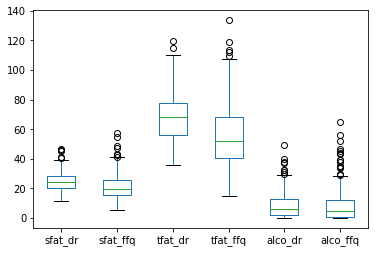

In [51]:
df.iloc[:,:-2].plot(kind='box')

<AxesSubplot:>

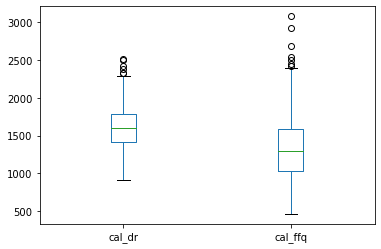

In [52]:
df.iloc[:,-2:].plot(kind='box')

#### 2.27

DR have greater values and have less spread

#### 2.28 

In [53]:
df.quantile([.2, .4, .6, .8, 1])

,sfat_dr,sfat_ffq,tfat_dr,tfat_ffq,alco_dr,alco_ffq,cal_dr,cal_ffq
0.2,18.806,14.84,54.070,38.12,0.870,0.760,1369.8,980.58
0.4,22.590,18.28,64.330,47.08,4.100,2.570,1532.2,1209.26
0.6,26.024,21.96,70.988,56.34,8.092,6.656,1671.8,1387.30
0.8,29.482,27.66,80.532,73.04,15.654,12.882,1874.8,1703.54
1.0,46.360,57.40,119.830,133.50,49.150,64.750,2518.0,3077.30


#### 2.29

In [54]:
df['tfat_dr_cal'] = df.tfat_dr*9/df.cal_dr*100
df['tfat_ffq_cal'] = df.tfat_ffq*9/df.cal_ffq*100

In [55]:
df[['tfat_dr_cal', 'tfat_ffq_cal']].describe()

,tfat_dr_cal,tfat_ffq_cal
count,173.000000,173.000000
mean,38.066267,36.855436
std,4.204829,6.728769
min,27.507580,15.924933
25%,35.178915,32.733325
50%,38.645562,36.365615
75%,40.997337,41.293096
max,47.597315,57.847534


#### 2.30

In [56]:
df[['tfat_dr_cal', 'tfat_ffq_cal']].quantile([.2, .4, .6, .8, 1])

,tfat_dr_cal,tfat_ffq_cal
0.2,33.958365,31.402684
0.4,37.328678,35.179624
0.6,39.764230,38.369988
0.8,41.628446,41.742806
1.0,47.597315,57.847534


## Environmental Health, Pediatrics

In [57]:
df = pd.read_csv('data/LEAD.DAT.txt').clean_names().set_index('id')
df.sample(5)

,area,ageyrs,sex,iqv_inf,iqv_comp,iqv_ar,iqv_ds,iqv_raw,iqp_pc,iqp_bd,iqp_oa,iqp_cod,iqp_raw,hh_index,iqv,iqp,iqf,iq_type,lead_grp,group,ld72,ld73,fst2yrs,totyrs,pica,colic,clumsi,irrit,convul,_2plat_r,_2plar_l,visrea_r,visrea_l,audrea_r,audrea_l,fwt_r,fwt_l,hyperact,maxfwt
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
116,1,10.58,1,4,6,4,8,22,9,8,13,12,42,48,72,104,86,1,1,1,29,23,1,10,2,1,2,2,2,17,18,21,25,21,23,50,42,2,50
133,1,9.92,1,7,12,12,13,39,9,14,13,10,46,70,99,111,105,1,1,1,2,22,2,6,2,2,2,2,2,15,18,25,20,24,21,59,51,0,59
147,2,6.92,2,5,8,8,6,30,13,11,5,14,43,58,85,106,94,1,1,1,28,26,2,6,2,1,2,2,2,14,10,30,33,29,32,40,37,1,40
603,1,5.58,2,5,9,10,10,34,8,8,10,9,35,58,91,92,91,2,3,2,45,29,2,5,2,2,2,2,2,99,99,99,99,99,99,99,99,1,99
157,3,10.58,1,8,6,9,9,32,11,11,16,17,55,77,87,127,107,1,1,1,27,28,2,7,2,2,2,2,2,18,21,19,19,19,21,51,56,0,56


In [58]:
df['group'] = df['group'].map({1: 'control', 2: 'exposed'})

In [59]:
df.group.value_counts()

control    78
exposed    46
Name: group, dtype: int64

#### 2.31

<AxesSubplot:xlabel='group', ylabel='ageyrs'>

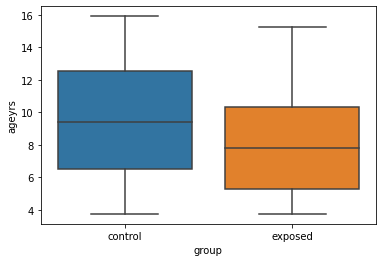

In [60]:
sns.boxplot(data=df, x='group', y='ageyrs')

<AxesSubplot:xlabel='group', ylabel='sex'>

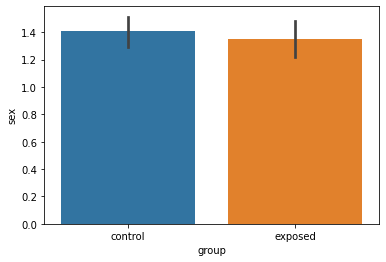

In [61]:
sns.barplot(data=df, x='group', y='sex')

#### 2.32

<AxesSubplot:xlabel='group', ylabel='iqp'>

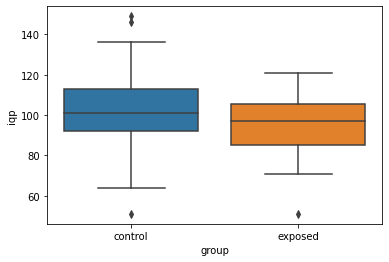

In [62]:
sns.boxplot(data=df, x='group', y='iqp')

<AxesSubplot:xlabel='group', ylabel='iqv'>

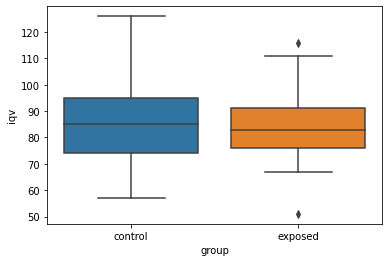

In [63]:
sns.boxplot(data=df, x='group', y='iqv')

## Cardiovascular Disease

In [64]:
df = pd.read_csv('data/APC.csv').clean_names().set_index('sample')

#### 2.33

In [65]:
df['mean'] = df[['a', 'b']].mean(axis=1)
df['std'] =  df[['a', 'b']].std(axis=1, ddof=0)
df['cv'] = 100*df['std']/df['mean']

#### 2.34

In [66]:
df.cv.mean()

4.772638458826677

## Microbiology

In [67]:
df = pd.read_csv('data/soy_plants.csv').clean_names().set_index('sample')
df.sample(5)

,i,u
sample,,
8,1.21,0.92
2,1.45,0.85
3,1.03,1.00
7,1.79,2.11
5,2.34,1.01


In [68]:
df_piv = df.pivot_longer(values_to='weight', names_to='soil')

#### 2.35

In [69]:
df_piv.groupby('soil').describe()

weight                                                     
      count     mean       std   min    25%    50%     75%   max
soil                                                            
i       8.0  1.63375  0.419896  1.03  1.390  1.645  1.8325  2.34
u       8.0  1.08375  0.509788  0.49  0.825  0.960  1.1425  2.11

#### 2.36

<AxesSubplot:xlabel='soil', ylabel='weight'>

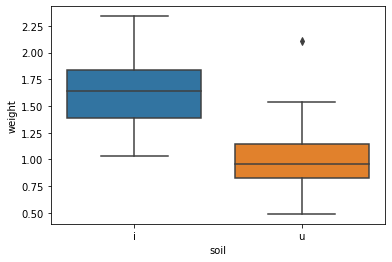

In [70]:
sns.boxplot(data=df_piv, x='soil', y='weight')

#### 2.37

Inoculation outperforms the second group

## Endocrinology

In [71]:
df = pd.read_csv('data/BONEDEN.DAT.txt').clean_names().set_index('id')
df.sample(5)

,age,zyg,ht1,wt1,tea1,cof1,alc1,cur1,men1,pyr1,ls1,fn1,fs1,ht2,wt2,tea2,cof2,alc2,cur2,men2,pyr2,ls2,fn2,fs2
id,,,,,,,,,,,,,,,,,,,,,,,,
1672702,41,2,159,72,0,14,0,0,0,0.0,0.82,0.67,1.06,164,53,0,35,1,0,0,18.75,0.92,0.79,1.02
1637901,47,1,157,65,14,7,2,2,2,0.0,0.80,0.67,1.22,165,62,0,28,14,13,0,6.00,0.75,0.63,1.12
1607901,62,2,171,97,0,7,0,0,1,0.0,0.50,0.49,1.15,166,56,14,56,8,4,1,43.20,0.47,0.48,0.73
1519402,52,1,157,53,28,28,1,1,1,0.0,0.65,0.66,0.98,160,55,28,0,0,3,1,13.20,0.64,0.71,1.01
1467301,58,1,161,61,0,21,0,0,1,0.0,0.70,0.68,1.18,160,73,0,14,0,2,1,39.00,0.63,0.64,1.04


#### 2.38 

In [72]:
df['ls_bmd_diff_abs'] = df.ls2 - df.ls1
df['ls_bmd_mean'] = (df.ls2 + df.ls1)/2
df['ls_bmd_diff_rel'] = 100 * df.ls_bmd_diff_abs / df.ls_bmd_mean

In [73]:
df['ls_bmd_diff_rel'].describe()

count    41.000000
mean     -4.949668
std      12.483420
min     -38.095238
25%     -11.940299
50%      -6.289308
75%       3.389831
max      19.819820
Name: ls_bmd_diff_rel, dtype: float64

#### 2.39

In [74]:
df['pyr_diff'] = df.pyr2 - df.pyr1
df['pyr_grp'] = pd.cut(df.pyr_diff, [0, 10, 20, 30, 40, 100], right=False)

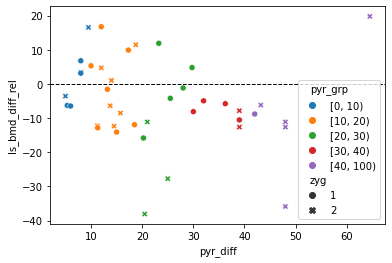

In [75]:
sns.scatterplot(data=df, x='pyr_diff', y='ls_bmd_diff_rel', hue='pyr_grp', style='zyg')
plt.axhline(y=0, ls='--', c='black', lw=1)

#### 2.40

The bigger difference the less bone density

#### 2.41-2.43

In [76]:
df['fn_bmd_diff_abs'] = df.fn2 - df.fn1
df['fn_bmd_mean'] = (df.fn2 + df.fn1)/2
df['fn_bmd_diff_rel'] = 100 * df.fn_bmd_diff_abs / df.fn_bmd_mean

In [77]:
df['fn_bmd_diff_rel'].describe()

count    41.000000
mean     -0.466253
std      14.161860
min     -34.782609
25%      -7.874016
50%      -2.941176
75%       7.874016
max      34.482759
Name: fn_bmd_diff_rel, dtype: float64

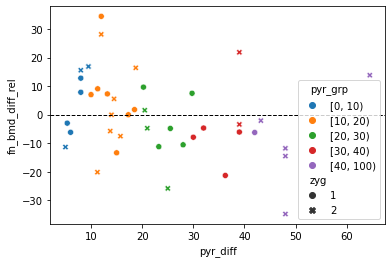

In [78]:
sns.scatterplot(data=df, x='pyr_diff', y='fn_bmd_diff_rel', hue='pyr_grp', style='zyg')
plt.axhline(y=0, ls='--', c='black', lw=1)

#### 2.44-2.46

In [79]:
df['fs_bmd_diff_abs'] = df.fs2 - df.fs1
df['fs_bmd_mean'] = (df.fs2 + df.fs1)/2
df['fs_bmd_diff_rel'] = 100 * df.fs_bmd_diff_abs / df.fs_bmd_mean

In [80]:
df['fs_bmd_diff_rel'].describe()

count    41.000000
mean     -3.241805
std      11.298304
min     -44.680851
25%      -8.547009
50%      -2.870813
75%       4.830918
max      12.962963
Name: fs_bmd_diff_rel, dtype: float64

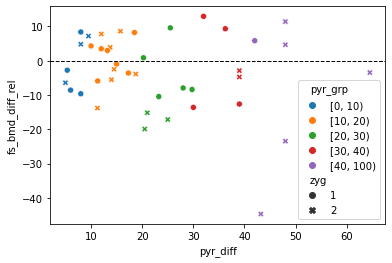

In [81]:
sns.scatterplot(data=df, x='pyr_diff', y='fs_bmd_diff_rel', hue='pyr_grp', style='zyg')
plt.axhline(y=0, ls='--', c='black', lw=1)

## Cardiovascular Disease

Lack of dataset :(